# Predicting Ethiopian Vehicle Insurance Premiums

- The goal of this project is to clean, analyse and predict vehicle insurance premiums of the state-owned Ethiopian Insurance Corporation (one of the biggest insurance companies in Ethiopia).
- The dataset we'll use describes vehicles, their insurance premiums and other insurance related atributes from July 2011 to June 2018. It can be found on [Mendeley Data](https://data.mendeley.com/datasets/34nfrk36dt/1).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

insurance_data_1 = pd.read_csv("insuranceData/motor_data11-14lats.csv")
insurance_data_2 = pd.read_csv("insuranceData/motor_data14-2018.csv")

### Dataset overview

Both of the provided dataset files include the same entry attributes and differ only in entry dates. They will need to be merged.

In [2]:
insurance_data = pd.concat([insurance_data_1, insurance_data_2], ignore_index=True)

print(insurance_data.shape)

(802036, 16)


Now let's look whether the provided attributes have been read correctly.

In [3]:
insurance_data.head(10)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
5,0,08-AUG-12,07-AUG-13,08,1202,285451.24,4286.650,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,26916.44
6,0,08-AUG-11,07-AUG-12,08,1202,285451.24,4123.564,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN
7,0,08-JUL-11,07-AUG-11,08,1202,285451.24,155.010,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN
8,0,08-JUL-12,07-JUL-13,11,1201,200000.00,3452.650,5000030346,1982.0,10.0,NaN,Station Wagones,4164.0,TOYOTA,Private,NaN
9,0,08-AUG-11,07-JUL-12,11,1201,200000.00,3077.540,5000030346,1982.0,10.0,NaN,Station Wagones,4164.0,TOYOTA,Private,NaN


There are multiple entries regarding the same vehicle as it has to be reinsured every year. That can lead to up to 7 entries for the same vehicle with only the premium amout fluctuating.

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802036 entries, 0 to 802035
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes:

Columns seem to have been read correctly. Let's now look at the values in individual columns.

#### Sex

In [5]:
insurance_data["SEX"].value_counts()

SEX
0    415297
1    318650
2     68089
Name: count, dtype: int64

In the dataset, there are 3 unique sex values with 0 being "legal entities", 1 - males and 2 - females.

#### Insurance start & end date

In [6]:
insurance_data["INSR_BEGIN"].value_counts()

INSR_BEGIN
08-JUL-17    16754
08-JUL-16    15640
08-JUL-11    15215
08-JUL-15    13464
08-JUL-14    13121
             ...  
29-MAY-13        3
28-SEP-15        3
03-MAR-15        1
12-SEP-14        1
12-SEP-12        1
Name: count, Length: 2556, dtype: int64

In [7]:
insurance_data["INSR_END"].value_counts()

INSR_END
07-JUL-18    17378
07-JUL-17    15827
07-JUL-16    14864
07-JUL-13    13594
07-JUL-15    13248
             ...  
23-OCT-11        1
13-AUG-11        1
12-SEP-11        1
13-OCT-11        1
09-AUG-11        1
Name: count, Length: 2834, dtype: int64

There do not seem to be any obvious errors in the data.

### Effective year

In [8]:
insurance_data["EFFECTIVE_YR"].value_counts()

EFFECTIVE_YR
11    199888
12     86791
15     75484
14     74001
16     68866
       ...  
/1         1
IN         1
8R         1
EA         1
RS         1
Name: count, Length: 151, dtype: int64

The "EFFECTIVE_YR" column variable indicated what year the policy became effective (was first insured with the company). There are numerous records that indicate a year older that the dataset (before 2011).

Yet, the columns contain values that are not indicative of a number and should be removed. Since there are a total of 802036 records, we can afford to lose quite a few. We also need to convert the years into a four-digit number.

In [9]:
insurance_data = insurance_data[insurance_data["EFFECTIVE_YR"].astype(str).str.match(r"^\d{2}$")]

def convert_year(y):
    y = int(y)
    if y > 18:
        return 1900 + y
    else:
        return 2000 + y

insurance_data["EFFECTIVE_YR_FULL"] = insurance_data["EFFECTIVE_YR"].apply(convert_year)

insurance_data.shape

(800865, 17)

After cleaning the effective year column, we have lost 1171 rows.

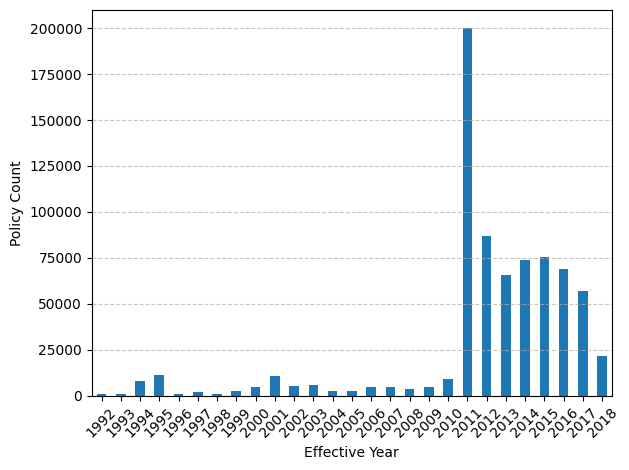

In [10]:
year_counts = insurance_data["EFFECTIVE_YR_FULL"].value_counts().sort_index()

year_counts = year_counts[
    (year_counts.index >= 1992) &
    (year_counts.index <= 2018)
]

year_counts.plot(kind='bar')
plt.xlabel("Effective Year")
plt.ylabel("Policy Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
year_counts = insurance_data["EFFECTIVE_YR_FULL"].value_counts().sort_index()
print(year_counts)

EFFECTIVE_YR_FULL
1919      394
1920      593
1921      532
1922      454
1923      488
        ...  
2014    74001
2015    75484
2016    68866
2017    57060
2018    21547
Name: count, Length: 100, dtype: int64


The data shows that most of the insured vehicles were first insured in 2011 and after.

#### Insurance type

In [12]:
insurance_data["INSR_TYPE"].value_counts()

INSR_TYPE
1202    593519
1201    207011
1204       335
Name: count, dtype: int64

There are a total of three types of insurance: 1201 - private, 1202 - commercial and 1204 - motor trade road risk (for motor trade workers that drive vehicles they do not personally own, such as mechanics).

#### Insured value

In [13]:
insurance_data["INSURED_VALUE"].value_counts()

INSURED_VALUE
0.00          343235
500000.00      13588
400000.00      12553
1500000.00     10844
600000.00      10658
               ...  
4342763.82         1
156975.00          1
329280.00          1
1094.89            1
1391526.48         1
Name: count, Length: 17368, dtype: int64

343235 vehicles in the dataset have no provided insurance value. This can cause quite a problem and therefore we will remove them.

In [14]:
insurance_data = insurance_data[insurance_data["INSURED_VALUE"] != 0]

insurance_data.shape

(457630, 17)

We are left with 457630 values.

#### Insurance premium

The premium amount are provided in Ethiopian birr (1000 Birr = 7,3 USD).

In [15]:
insurance_data["PREMIUM"][insurance_data["PREMIUM"] <= 0].count()

22

There are 22 vehicles with a premium of 0 or less. This is not acceptable and we will remove them.

In [16]:
insurance_data = insurance_data[insurance_data["PREMIUM"] > 0]

#### Object ID

In [17]:
insurance_data["OBJECT_ID"].value_counts()

OBJECT_ID
5000116673    17
5000036477    16
5000021028    16
5000036873    15
5000036245    15
              ..
5000155306     1
5000155302     1
5000155301     1
5000685254     1
5001350508     1
Name: count, Length: 142662, dtype: int64

Some vehicles appear more that 7 times which is not possible.

In [18]:
insurance_data[insurance_data["OBJECT_ID"].astype(str) == "5000116673"]

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,EFFECTIVE_YR_FULL
75918,1,31-JUL-13,30-JUL-14,11,1202,414000.0,6564.04,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,2011
75919,0,08-JUL-13,07-JUL-14,88,1202,120000.0,2643.35,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,1988
75920,0,04-NOV-12,07-JUL-13,88,1202,241442.0,3802.86,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,1988
75921,0,08-SEP-12,03-NOV-12,88,1202,241442.0,1191.43,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,1988
75922,1,31-JUL-12,30-JUL-13,11,1202,414000.0,4473.66,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,2011
75923,0,08-JUL-12,07-SEP-12,88,1202,241442.0,1966.70,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,1988
75924,1,31-JUL-11,30-JUL-12,11,1202,414000.0,3718.13,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,2011
75925,0,08-OCT-11,07-JUL-12,88,1202,241442.0,4136.43,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,1988
75926,0,08-JUL-11,07-OCT-11,11,1202,241442.0,1028.48,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,2011
359619,1,31-MAR-18,30-MAR-19,13,1202,600000.0,5576.76,5000116673,2006.0,0.0,220.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN,2013


In [19]:
(insurance_data["OBJECT_ID"].value_counts() > 7).sum()

4887

There are a total of 4887 OBJECT_IDs that apprear more than 7 times. Correcting each one would have to be done manually by hand and therefore it would be much simpler just to remove the entries completely. In a real-world scenario all values should be investigated.

In [20]:
object_id_counts = insurance_data["OBJECT_ID"].value_counts()

ids_to_remove = object_id_counts[object_id_counts > 7].index

insurance_data = insurance_data[~insurance_data["OBJECT_ID"].isin(ids_to_remove)]

print(insurance_data.shape)

(417177, 17)


#### Year of production

In [21]:
insurance_data["PROD_YEAR"].value_counts()

PROD_YEAR
2012.0    33762
2014.0    31020
2010.0    29230
2013.0    26575
2008.0    26539
2011.0    24219
2015.0    22896
2006.0    21431
2007.0    19256
2009.0    18577
2005.0    14350
2016.0    13508
2000.0    11614
2004.0    11440
2003.0    10832
2001.0    10305
2002.0     9458
1999.0     7851
1990.0     7377
1998.0     6329
2017.0     5629
1996.0     5437
1997.0     5406
1995.0     5139
1992.0     4294
1988.0     3792
1986.0     3523
1989.0     3480
1991.0     3442
1994.0     3261
1993.0     3076
1985.0     2988
1987.0     2410
1982.0     1946
1984.0     1906
1983.0     1643
1981.0     1386
1980.0      354
2018.0      245
1970.0      154
1978.0      149
1974.0      140
1973.0      113
1975.0      103
1976.0       96
1977.0       84
1972.0       66
1971.0       66
1979.0       65
1968.0       50
1969.0       36
1967.0       24
1966.0       23
1962.0        7
1960.0        6
1964.0        5
1957.0        3
1963.0        3
1958.0        2
1961.0        1
Name: count, dtype: int64

There are no abnormalities in this attribute.

#### Number of seats

In [22]:
insurance_data["SEATS_NUM"].value_counts()

SEATS_NUM
4.0      127674
1.0       88892
2.0       48929
0.0       44605
8.0       20455
          ...  
199.0         1
112.0         1
125.0         1
72.0          1
178.0         1
Name: count, Length: 91, dtype: int64

There are a total of 44605 vehicles with 0 seats which is impossible. Also, the number of seats should not exceed 256 (seats in the largest bus in the world).

In [23]:
insurance_data = insurance_data[(insurance_data["SEATS_NUM"] > 0) & (insurance_data["SEATS_NUM"] <= 256)]

print(insurance_data.shape)

(372488, 17)


#### Carrying capacity

In [24]:
insurance_data["CARRYING_CAPACITY"].value_counts()

CARRYING_CAPACITY
0.00         75787
7.00         39722
10.00        23292
6.00         16405
11.00         5428
             ...  
43.85            1
45.40            1
18278.00         1
8873.00          1
130000.00        1
Name: count, Length: 1673, dtype: int64

#### Vehicle type

In [25]:
insurance_data["TYPE_VEHICLE"].value_counts()

TYPE_VEHICLE
Pick-up                      90886
Truck                        87168
Automobile                   60422
Bus                          53908
Station Wagones              41352
Motor-cycle                  23311
Tanker                        6500
Special construction          4836
Tractor                       3725
Trailers and semitrailers      380
Name: count, dtype: int64

#### CCM_TON

In [26]:
insurance_data["CCM_TON"].value_counts()

CCM_TON
4164.00     44252
2494.00     29786
0.00        23002
8226.00     14271
9726.00     13625
            ...  
12809.00        1
1890.00         1
2693.00         1
10121.00        1
199.75          1
Name: count, Length: 2439, dtype: int64

#### Vehicle maker

In [27]:
insurance_data["MAKE"].value_counts()

MAKE
TOYOTA             153401
ISUZU               37516
NISSAN              24247
IVECO               15428
SINO HOWO           13677
                    ...  
TOYOTA 4 RUNNER         1
DEAWOO USE              1
SEDEN                   1
HYDROLIC                1
FRANCE                  1
Name: count, Length: 544, dtype: int64

#### Primary function of vehicle

In [28]:
insurance_data["USAGE"].value_counts()

USAGE
Own Goods                 129952
Private                   111810
General Cartage            55266
Fare Paying Passengers     32820
Own service                29700
Ambulance                   2578
Taxi                        2410
Agricultural Own Farm       2123
Special Construction        2036
Agricultural Any Farm       1473
Car Hires                   1096
Others                       655
Learnes                      478
Fire fighting                 91
Name: count, dtype: int64

#### Paid claim sum

In [29]:
insurance_data["CLAIM_PAID"].value_counts()

CLAIM_PAID
40000.00     155
20000.00     120
10000.00     108
30000.00      98
5750.00       98
            ... 
152628.84      1
104812.92      1
209469.56      1
78287.06       1
27421.77       1
Name: count, Length: 36903, dtype: int64